In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("second_hand_cars.csv")

df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# TRATAMIENTO DE LOS DATOS

In [3]:
df[df["EngineV"] > 10].count()

Brand           21
Price           20
Body            21
Mileage         21
EngineV         21
Engine Type     21
Registration    21
Year            21
Model           21
dtype: int64

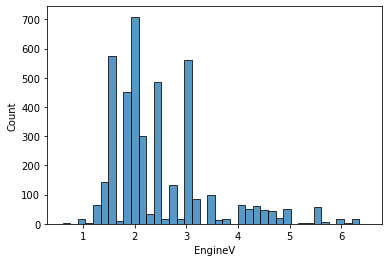

In [4]:
sns.histplot(df[df["EngineV"] < 7]["EngineV"])

plt.show()

In [5]:
df.drop(df[df["EngineV"] > 7].index, inplace = True)

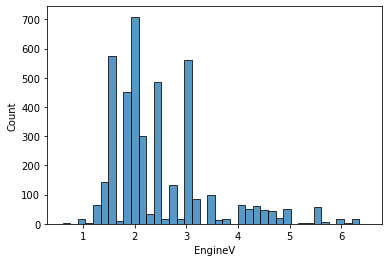

In [6]:
sns.histplot(df["EngineV"])

plt.show()

In [7]:
df.drop(df[df["Year"] < 1985].index, inplace = True)

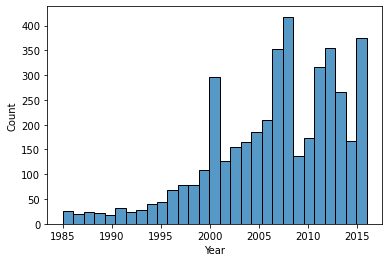

In [8]:
sns.histplot(df["Year"])

plt.show()

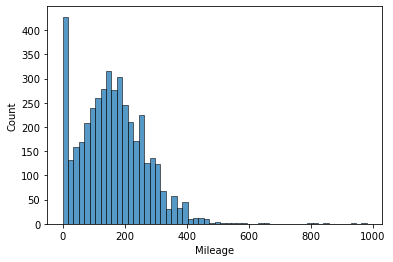

In [9]:
sns.histplot(df["Mileage"])

plt.show()

In [10]:
df.drop(df[df["Mileage"] > 420].index, inplace = True)

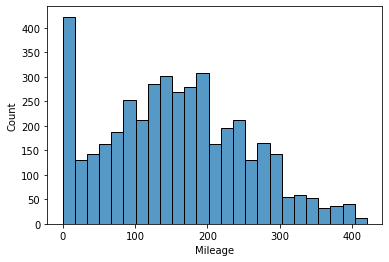

In [11]:
sns.histplot(df["Mileage"])

plt.show()

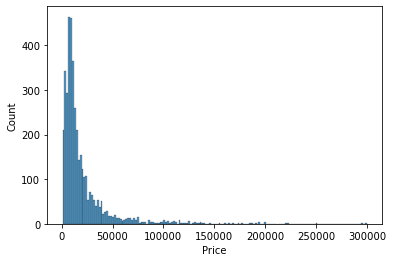

In [12]:
sns.histplot(df["Price"])

plt.show()

In [13]:
df.drop(df[df["Price"] > 125000].index, inplace = True)

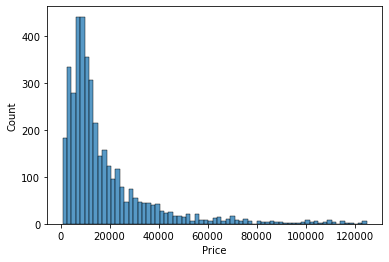

In [14]:
sns.histplot(df["Price"])

plt.show()

In [15]:
df.dropna(subset=['Price'], inplace=True)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [16]:
df["Brand"].unique()
df["Body"].unique()
df["Engine Type"].unique()
#df["Model"].unique()

array(['Petrol', 'Gas', 'Diesel', 'Other'], dtype=object)

In [17]:
df.isnull().sum()

Brand             0
Price             0
Body              0
Mileage           0
EngineV         143
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4040 non-null   object 
 1   Price         4040 non-null   float64
 2   Body          4040 non-null   object 
 3   Mileage       4040 non-null   int64  
 4   EngineV       3897 non-null   float64
 5   Engine Type   4040 non-null   object 
 6   Registration  4040 non-null   object 
 7   Year          4040 non-null   int64  
 8   Model         4040 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 315.6+ KB


In [19]:
df_num = df[["Price", "Mileage", "EngineV", "Year"]]
df_num.head(3)

,Price,Mileage,EngineV,Year
0,4200.0,277,2.0,1991
2,13300.0,358,5.0,2003
3,23000.0,240,4.2,2007


In [20]:
df_cat = df.drop(df_num.columns, axis = 1)

df_cat.head(3)

,Brand,Body,Engine Type,Registration,Model
0,BMW,sedan,Petrol,yes,320
2,Mercedes-Benz,sedan,Gas,yes,S 500
3,Audi,crossover,Petrol,yes,Q7


In [21]:
df_br = pd.get_dummies(data = df_cat["Brand"], prefix = "Brand")
df_bo = pd.get_dummies(data = df_cat["Body"], prefix = "Body")
df_re = pd.get_dummies(data = df_cat["Registration"], prefix = "Registration")
df_en = pd.get_dummies(data = df_cat["Engine Type"], prefix = "Engine Type")


In [22]:
df_br.shape

(4040, 7)

In [23]:
df_cat = pd.concat([df_cat, df_br, df_bo, df_en, df_re], axis = 1)

df_cat

,Brand,Body,Engine Type,Registration,Model,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,BMW,sedan,Petrol,yes,320,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,Mercedes-Benz,sedan,Gas,yes,S 500,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,Audi,crossover,Petrol,yes,Q7,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,Toyota,crossover,Petrol,yes,Rav 4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,Audi,vagon,Diesel,yes,A6,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,sedan,Diesel,yes,S 350,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4341,BMW,sedan,Petrol,yes,535,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4342,BMW,sedan,Petrol,yes,520,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4343,Toyota,sedan,Petrol,yes,Corolla,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [24]:
df_cat.drop(["Brand", "Body", "Registration", "Engine Type", "Model"], axis = 1, inplace = True)


In [25]:
df["Registration"].value_counts(normalize=True)

yes    0.90495
no     0.09505
Name: Registration, dtype: float64

In [26]:
df_cat

,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
7,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4341,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4342,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4343,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [27]:
df_2 = pd.concat([df_num, df_cat], axis = 1)
df_2

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,4200.0,277,2.0,1991,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,13300.0,358,5.0,2003,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,23000.0,240,4.2,2007,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,18300.0,120,2.0,2011,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
7,14200.0,200,2.7,2006,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,125000.0,9,3.0,2014,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4341,6500.0,1,3.5,1999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4342,8000.0,194,2.0,1985,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4343,14200.0,31,NaN,2014,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1


In [28]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)

df_imp = imputer.fit_transform(df_2)

df_imp

array([[4.20e+03, 2.77e+02, 2.00e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [1.33e+04, 3.58e+02, 5.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [2.30e+04, 2.40e+02, 4.20e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [8.00e+03, 1.94e+02, 2.00e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [1.42e+04, 3.10e+01, 2.20e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [1.35e+04, 1.24e+02, 2.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00]])

In [29]:
df_2 = pd.DataFrame(df_imp, columns = df_2.columns)

df_2

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,4200.0,277.0,2.0,1991.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,13300.0,358.0,5.0,2003.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,23000.0,240.0,4.2,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,18300.0,120.0,2.0,2011.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,14200.0,200.0,2.7,2006.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,125000.0,9.0,3.0,2014.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4036,6500.0,1.0,3.5,1999.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4037,8000.0,194.0,2.0,1985.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4038,14200.0,31.0,2.2,2014.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [30]:
df_2.isnull().sum()

Price                  0
Mileage                0
EngineV                0
Year                   0
Brand_Audi             0
Brand_BMW              0
Brand_Mercedes-Benz    0
Brand_Mitsubishi       0
Brand_Renault          0
Brand_Toyota           0
Brand_Volkswagen       0
Body_crossover         0
Body_hatch             0
Body_other             0
Body_sedan             0
Body_vagon             0
Body_van               0
Engine Type_Diesel     0
Engine Type_Gas        0
Engine Type_Other      0
Engine Type_Petrol     0
Registration_no        0
Registration_yes       0
dtype: int64

# CLUSTERING

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

In [32]:
df_2.drop(["BMW"], axis = 1, inplace = True)

KeyError: "['BMW'] not found in axis"

In [33]:
from sklearn.cluster import KMeans

In [34]:
X = df_2

In [35]:
X.dtypes

Price                  float64
Mileage                float64
EngineV                float64
Year                   float64
Brand_Audi             float64
Brand_BMW              float64
Brand_Mercedes-Benz    float64
Brand_Mitsubishi       float64
Brand_Renault          float64
Brand_Toyota           float64
Brand_Volkswagen       float64
Body_crossover         float64
Body_hatch             float64
Body_other             float64
Body_sedan             float64
Body_vagon             float64
Body_van               float64
Engine Type_Diesel     float64
Engine Type_Gas        float64
Engine Type_Other      float64
Engine Type_Petrol     float64
Registration_no        float64
Registration_yes       float64
dtype: object

In [43]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_2)
X

array([[0.0273752 , 0.65952381, 0.23728814, ..., 1.        , 0.        ,
        1.        ],
       [0.10064412, 0.85238095, 0.74576271, ..., 0.        , 0.        ,
        1.        ],
       [0.17874396, 0.57142857, 0.61016949, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.05797101, 0.46190476, 0.23728814, ..., 1.        , 0.        ,
        1.        ],
       [0.1078905 , 0.07380952, 0.27118644, ..., 1.        , 0.        ,
        1.        ],
       [0.10225443, 0.2952381 , 0.23728814, ..., 0.        , 0.        ,
        1.        ]])

In [44]:
# Método del codo
inercias = list()
  
for k in range(1, 10): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
    
inercias

[10339.509902010559,
 8535.643104537075,
 7817.93518812656,
 7060.5924448491305,
 6666.745999825057,
 6278.123182318322,
 5868.687399834942,
 5601.688713967009,
 5413.525000356412]

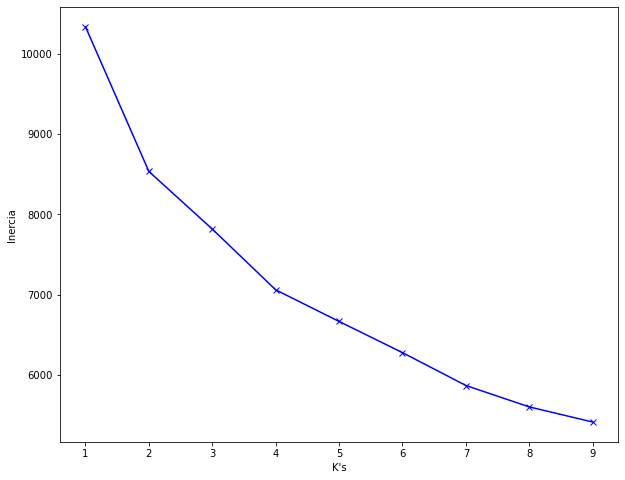

In [45]:
plt.figure(figsize = (10, 8))

plt.plot(range(1, len(inercias) + 1), inercias, marker = "x", color = "blue")

plt.xlabel("K's") 
plt.ylabel("Inercia") 

plt.show()

In [50]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
kmeans.labels_

array([0, 2, 0, ..., 0, 0, 1])

In [51]:
kmeans.cluster_centers_

array([[ 1.43666275e-01,  3.19459142e-01,  3.28287976e-01,
         6.97823693e-01,  1.11111111e-01,  2.05519245e-01,
         1.56136529e-01,  1.02396514e-01,  4.72040668e-02,
         1.87363834e-01,  1.90268700e-01,  1.75744372e-01,
         1.11111111e-01,  1.07480029e-01,  5.49019608e-01,
         4.06681191e-02,  1.59767611e-02,  0.00000000e+00,
         3.88578059e-16,  5.55111512e-17,  1.00000000e+00,
        -6.93889390e-17,  1.00000000e+00],
       [ 1.73059402e-01,  3.80361964e-01,  2.90168436e-01,
         7.57049543e-01,  7.72585670e-02,  1.15264798e-01,
         2.49221184e-01,  2.80373832e-02,  2.00000000e-01,
         4.73520249e-02,  2.82866044e-01,  2.22429907e-01,
         2.61682243e-02,  1.07788162e-01,  1.76947040e-01,
         1.18380062e-01,  3.48286604e-01,  9.90654206e-01,
         4.44089210e-16,  9.34579439e-03,  0.00000000e+00,
        -5.55111512e-17,  1.00000000e+00],
       [ 1.05201708e-01,  4.18969903e-01,  3.40240406e-01,
         6.29415143e-01,  8.7

In [52]:
df_centroides  = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_2.columns])
df_centroides

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,0.143666,0.319459,0.328288,0.697824,0.111111,0.205519,0.156137,0.102397,0.047204,0.187364,...,0.107480,0.549020,0.040668,0.015977,0.000000e+00,3.885781e-16,5.551115e-17,1.000000e+00,-6.938894e-17,1.0
1,0.173059,0.380362,0.290168,0.757050,0.077259,0.115265,0.249221,0.028037,0.200000,0.047352,...,0.107788,0.176947,0.118380,0.348287,9.906542e-01,4.440892e-16,9.345794e-03,0.000000e+00,-5.551115e-17,1.0
2,0.105202,0.418970,0.340240,0.629415,0.087537,0.117211,0.157270,0.183976,0.050445,0.259644,...,0.074184,0.489614,0.057864,0.031157,9.436896e-16,8.367953e-01,1.632047e-01,-4.996004e-16,-6.938894e-17,1.0
3,0.027561,0.557031,0.291314,0.528730,0.260417,0.278646,0.171875,0.028646,0.067708,0.010417,...,0.062500,0.473958,0.257812,0.057292,6.796875e-01,7.031250e-02,5.208333e-02,1.979167e-01,1.000000e+00,0.0


In [53]:
df_centroides = scaler.inverse_transform(df_centroides)

df_centroides =  pd.DataFrame(data = df_centroides, columns = [df_2.columns])
df_centroides

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,18643.351409,134.172840,2.536899,2006.632534,0.111111,0.205519,0.156137,0.102397,0.047204,0.187364,...,0.107480,0.549020,0.040668,0.015977,0.000000e+00,3.885781e-16,5.551115e-17,1.000000e+00,-6.938894e-17,1.0
1,22293.977707,159.752025,2.311994,2008.468536,0.077259,0.115265,0.249221,0.028037,0.200000,0.047352,...,0.107788,0.176947,0.118380,0.348287,9.906542e-01,4.440892e-16,9.345794e-03,0.000000e+00,-5.551115e-17,1.0
2,13866.052077,175.967359,2.607418,2004.511869,0.087537,0.117211,0.157270,0.183976,0.050445,0.259644,...,0.074184,0.489614,0.057864,0.031157,9.436896e-16,8.367953e-01,1.632047e-01,-4.996004e-16,-6.938894e-17,1.0
3,4223.072917,233.953125,2.318750,2001.390625,0.260417,0.278646,0.171875,0.028646,0.067708,0.010417,...,0.062500,0.473958,0.257812,0.057292,6.796875e-01,7.031250e-02,5.208333e-02,1.979167e-01,1.000000e+00,0.0


In [54]:
df_2["cluster"] = kmeans.labels_

df_2

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes,cluster
0,4200.0,277.0,2.0,1991.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,13300.0,358.0,5.0,2003.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
2,23000.0,240.0,4.2,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,18300.0,120.0,2.0,2011.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,14200.0,200.0,2.7,2006.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,125000.0,9.0,3.0,2014.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4036,6500.0,1.0,3.5,1999.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4037,8000.0,194.0,2.0,1985.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4038,14200.0,31.0,2.2,2014.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [59]:
X2 = np.array(df_2["cluster"])
X2.shape, X.shape

((4040,), (4040, 23))

In [60]:
X2_train, X2_test, X_train, X_test = train_test_split(X2, X, test_size = 0.30)

print(f"Conjunto de Train: {X2_train.shape, X_train.shape}")
print(f"Conjunto de Test: {X2_test.shape, X_test.shape}")

Conjunto de Train: ((2828,), (2828, 23))
Conjunto de Test: ((1212,), (1212, 23))


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [63]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X2_train, X_train)

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 ... 0 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Ahora vamos a separar la columna "objetivo" del resto de columnas
df_2Price = df["Price"].copy()

# Como ya tenemos la columna "objetivo" en otra variable vamos a eliminarla del DataFrame original
df_2.drop("Price", axis = 1, inplace = True)

In [ ]:
# Ya tenemos todos los datos en numericos, vamos a hacer Feature Selection
# Este primer Feature Selection lo hare utilizando la columna "Age-Binning" (excluyendo "Age")

X = np.asarray(df_2)
y = np.asarray(df_2Price)

In [ ]:
df_2.columns

In [ ]:
df_2Price

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators = 250, random_state = 0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], df_2.columns[f]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color = "r", yerr = std[indices], align = "center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# REGRESIÓN MULTILINEAL

In [ ]:
# Esta vez vamos a utilizar 3 columnas para predecir "Price"
df_2[["Mileage", "EngineV", "Year"]]

# Primer Modelo

In [ ]:
# Millas, Cilindrada, Año

X = np.array(df_2[["Mileage", "EngineV", "Year"]])
y = np.array(df_2Price)

In [ ]:
X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

print(f"Conjunto de Train: {X_train.shape, X_test.shape}")
print(f"Conjunto de Test: {y_train.shape, y_test.shape}")

In [ ]:
# Algoritmo de regresión lineal de sklearn

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

In [ ]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

# Segundo modelo

In [ ]:
# Todas las variables

df_2.columns
columnas= ['Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes']

In [ ]:
X = np.array(df_2[columnas])
y = np.array(df_2Price)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

print(f"Conjunto de Train: {X_train.shape, X_test.shape}")
print(f"Conjunto de Test: {y_train.shape, y_test.shape}")

In [ ]:
# Algoritmo de regresión lineal de sklearn

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

In [ ]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [ ]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

# Tercer modelo

In [ ]:
plt.figure(figsize = (15, 10))

sns.heatmap(df_2.corr(), annot = True)

plt.show()

In [ ]:
# Veamos como se relacionan todas las columnas con "CO2EMISSIONS".

for col in df.columns:
    sns.scatterplot(x = df[col], y = df["Price"], color = "r")
    plt.show()